#TItanic Survival Prediction using machine zlearning Classification Algorithm

#IMPORTING LIBRARIES REQUIRED

In [311]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORT THE DATASET
# The Dataset contains 892 rows and 12 columns
# Columns name and their meaning

1.Passenger id --> id given to the passenger
2.Survived ---> whether traveller survived(1) or not(0)
3.Pclass ---> gives class of each passengers
4.Name ---> Name of the passengers
5.Sex
6.Age
7.Sibsp --> no of siblings or spouse on the ship
8.Parch --> parent children on the ship
9.Ticket --> type of ticket
10.Fare --> fare paid to be on the ship
11.Cabin
12.Embarked --> from where do they started the journey

In [312]:
Data=pd.read_csv("dataset.csv")
Data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [313]:
Data.shape
# our datset contains 891 rows and 12 columns

(891, 12)

In [314]:
#Get some statistics of our data
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [315]:
#Get a count of no of survivors
Data['Survived'].value_counts()
# as we look only 342 paasengers survived out of 891 passengers

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

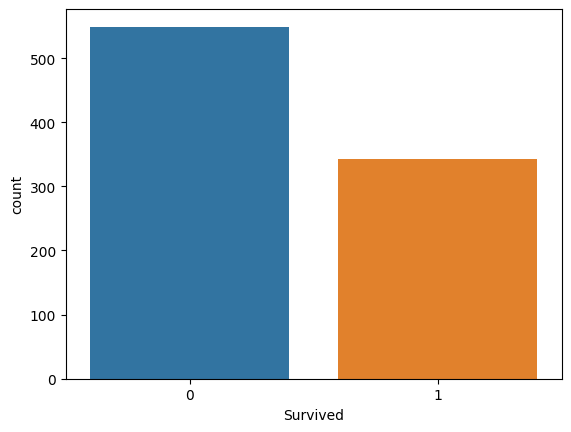

In [316]:
#visualize the count of survivors
sns.countplot(x='Survived',data=Data)

In [317]:
# Get a count of who? (the sex of people on titanic)
Data['Sex'].value_counts()
#now we can see there are 577 male and 314 females


male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

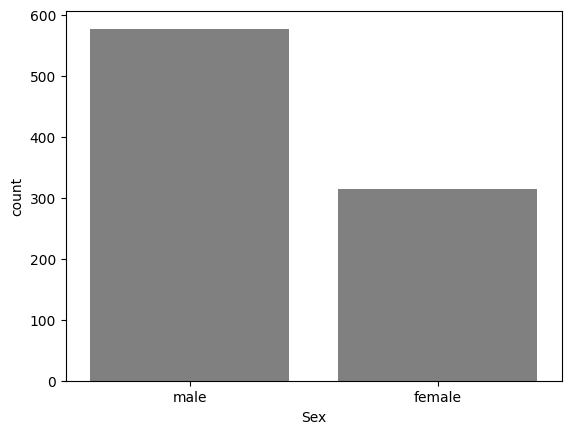

In [318]:
sns.countplot(x='Sex',data=Data,color='grey')

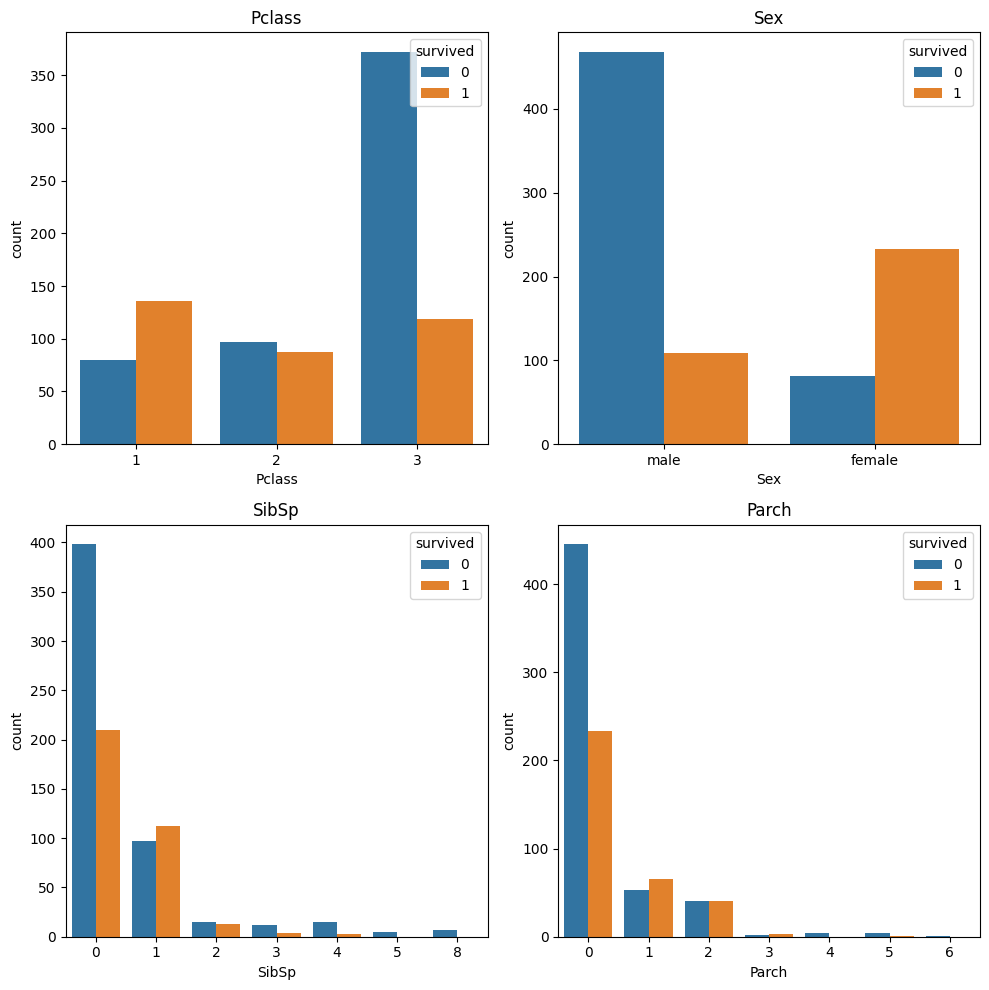

In [319]:
#Visualize the count of survivors for columns  'sex' 'Pclass' 'Age' 'sibsp' 'Parch' 'fare' 
cols=['Pclass','Sex','SibSp','Parch']
# now we need to create (3,2) matrix to display all 6 graphs
n_rows=2
n_cols=2

#The subplo grid and figure size of each graph
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*5,n_rows*5))


for r in range (0,n_rows):
    for c in range (0,n_cols):
        i=r*n_cols+c # index to go through no of columns
        ax=axs[r,c] # show where to position each subplot
        sns.countplot(x=cols[i],data=Data,hue='Survived',ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived',loc='upper right')

plt.tight_layout()

 

In [320]:
# Look at survival rate by sex
Data.groupby('Sex')[['Survived']].mean()
# we foound that 74% female survived
# while on other hand only 18% males survived 

,Survived
Sex,
female,0.742038
male,0.188908


In [321]:
#Look at survival rate by sex and class
Data.pivot_table('Survived',index='Sex',columns='Pclass')
# females in first class has 96% survival rate and male has 36% survival rate

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<Axes: xlabel='Sex'>

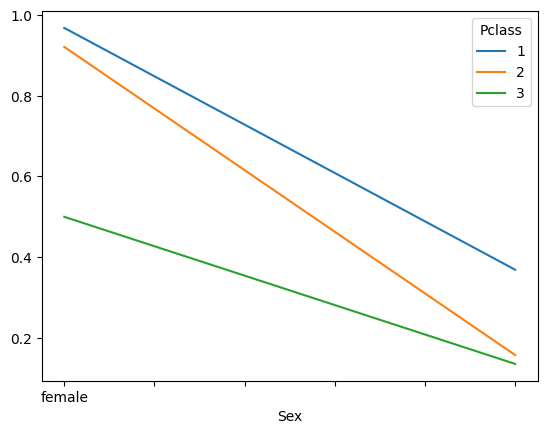

In [322]:
#Look at survival rate by sex and class visually
Data.pivot_table('Survived',index='Sex',columns='Pclass').plot()
# females in first class has 96% survival rate and male has 36% survival rate

<Axes: xlabel='Pclass', ylabel='Survived'>

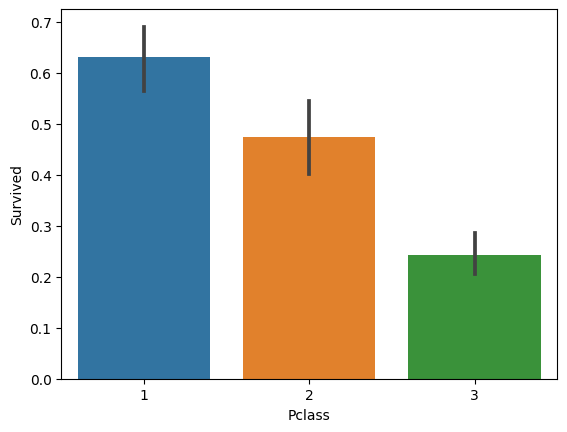

In [323]:
#Plot survival rate of each class
sns.barplot(x='Pclass',y='Survived',data=Data)

In [324]:
#Look at survival rate by sex,age and class
# divide the age into two parts [0,18] and [18,80]
age=pd.cut(Data['Age'],[0,18,80])
Data.pivot_table('Survived',['Sex',age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

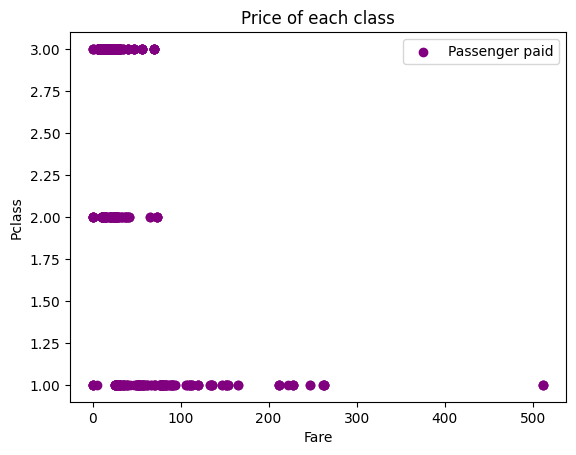

In [325]:
#Plot the price of each class
plt.scatter(Data['Fare'],Data['Pclass'],color='purple',label='Passenger paid')
plt.ylabel('Pclass')
plt.xlabel('Fare')
plt.title('Price of each class')
plt.legend()
plt.show()

In [326]:
# now get the count of people from different class
Data['Pclass'].value_counts()
# now from output we see that
# people from third class are :: 491
# people from second clas are :: 216
# people from third class are :: 184

3    491
1    216
2    184
Name: Pclass, dtype: int64

#Handling missing values


In [327]:
# check whether dataset has missing values or not
Data.isnull().sum()
# we found that there are int otal 866 missing values in our dataset
# now we see Age column is missing 177 values
# Cabin is miising 687 values which is a lot so we can drop this column
# Embarked is missing two values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [328]:
#Look at all of the values in each column and get a count
for val in Data:
    print(Data[val].value_counts())
    print()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88,

In [329]:
# Drop the column cabin since it has two many missing values
Data=Data.drop(['Cabin'],axis=1)


In [330]:
# we can also drop name column because that is not required fro survival prediction
Data=Data.drop(['Name'],axis=1)


In [331]:
# we can aldo drop because type of ticket can't determine your survival but class will determine
Data=Data.drop(['Ticket'],axis=1)

In [332]:
# we can also drop first column as it is not useful
Data=Data.drop(['PassengerId'],axis=1)

In [333]:

# Now lets put mean value in the missing rows of Age column
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

imputer.fit(Data[['Age']])
Data[['Age']]=imputer.transform(Data[['Age']])
Data



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [334]:
# For column embarked since there are only two missing values
# we will drop rows havimg missing values
Data=Data.dropna(subset=['Embarked'])
Data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [335]:
# Now check again for null values
# now we don't have any missing values
Data.isnull().sum().sum()

0

In [336]:
# print unique values from sex column
Data['Sex'].unique()


array(['male', 'female'], dtype=object)

In [337]:
# print unique values for Embarked column
Data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [338]:
Data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

# Too apply ML classification algorithm we need all values to be in integer form
# Now lets convert Sex aand Embarked column into numerical form using label encoder
# now as Embarked has three different values encoding will convert all values in numbered form


# We can also use one hot encoder for converting into numerical values


In [339]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Data.loc[:,'Sex']=le.fit_transform(Data.loc[:,'Sex'].values)
Data

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_11892\1097169563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.loc[:,'Sex']=le.fit_transform(Data.loc[:,'Sex'].values)
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_11892\1097169563.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Data.loc[:,'Sex']=le.fit_transform(Data.loc[:,'Sex'].values)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S
887,1,1,0,19.000000,0,0,30.0000,S
888,0,3,0,29.699118,1,2,23.4500,S
889,1,1,1,26.000000,0,0,30.0000,C


In [340]:
# print unique values from sex column
Data['Sex'].unique()

array([1, 0])

In [341]:
#Similarly encode Embarked column
Data['Embarked']=le.fit_transform(Data['Embarked'])
Data

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_11892\1055829224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Embarked']=le.fit_transform(Data['Embarked'])


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [342]:
# print unique values for Embarked column
Data['Embarked'].unique()

array([2, 0, 1])

In [343]:
# Now all data is numeric 
Data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [344]:
# Separate data into dependent and independent variables
# dependent variables
X=Data.iloc[:,1:8].values
X


array([[ 3.        ,  1.        , 22.        , ...,  0.        ,
         7.25      ,  2.        ],
       [ 1.        ,  0.        , 38.        , ...,  0.        ,
        71.2833    ,  0.        ],
       [ 3.        ,  0.        , 26.        , ...,  0.        ,
         7.925     ,  2.        ],
       ...,
       [ 3.        ,  0.        , 29.69911765, ...,  2.        ,
        23.45      ,  2.        ],
       [ 1.        ,  1.        , 26.        , ...,  0.        ,
        30.        ,  0.        ],
       [ 3.        ,  1.        , 32.        , ...,  0.        ,
         7.75      ,  1.        ]])

In [345]:
Y=Data.iloc[:,0].values
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

# Now lets split the data int o train and test 

In [346]:
# split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
# If no random_state is mentioned everytime different output will be produced


In [347]:
X_train

array([[ 3.        ,  1.        , 28.5       , ...,  0.        ,
         7.2292    ,  0.        ],
       [ 2.        ,  0.        , 27.        , ...,  0.        ,
        10.5       ,  2.        ],
       [ 1.        ,  1.        , 38.        , ...,  0.        ,
         0.        ,  2.        ],
       ...,
       [ 3.        ,  1.        , 39.        , ...,  0.        ,
         7.925     ,  2.        ],
       [ 3.        ,  1.        , 29.69911765, ...,  0.        ,
         7.75      ,  1.        ],
       [ 3.        ,  1.        , 16.        , ...,  1.        ,
        39.6875    ,  2.        ]])

In [348]:
X_test

array([[ 2.        ,  0.        , 28.        , ...,  0.        ,
        13.        ,  2.        ],
       [ 1.        ,  1.        , 56.        , ...,  0.        ,
        35.5       ,  0.        ],
       [ 3.        ,  1.        , 19.        , ...,  0.        ,
         7.8958    ,  2.        ],
       ...,
       [ 3.        ,  1.        , 20.        , ...,  0.        ,
         9.5       ,  2.        ],
       [ 3.        ,  1.        , 29.69911765, ...,  0.        ,
         8.05      ,  2.        ],
       [ 2.        ,  1.        , 24.        , ...,  0.        ,
        10.5       ,  2.        ]])

In [349]:
Y_train

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [350]:
Y_test

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0], dtype=int64)

#Feature scaling
# It is a process of bringing all values withion same range so easy to compare
# in MinmaxScaler it scales the value in range between 0 AND 1
# apply on Age and fare column



In [351]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_train


array([[1.        , 1.        , 0.38162544, ..., 0.        , 0.01411046,
        0.        ],
       [0.5       , 0.        , 0.36123947, ..., 0.        , 0.02049464,
        1.        ],
       [0.        , 1.        , 0.51073661, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.52432726, ..., 0.        , 0.01546857,
        1.        ],
       [1.        , 1.        , 0.39792223, ..., 0.        , 0.01512699,
        0.5       ],
       [1.        , 1.        , 0.21174232, ..., 0.16666667, 0.07746484,
        1.        ]])

In [352]:
X_test=sc.fit_transform(X_test)
X_test

array([[0.5       , 0.        , 0.34243804, ..., 0.        , 0.02537431,
        1.        ],
       [0.        , 1.        , 0.69650986, ..., 0.        , 0.06929139,
        0.        ],
       [1.        , 1.        , 0.22862924, ..., 0.        , 0.01541158,
        1.        ],
       ...,
       [1.        , 1.        , 0.24127466, ..., 0.        , 0.01854277,
        1.        ],
       [1.        , 1.        , 0.3639241 , ..., 0.        , 0.01571255,
        1.        ],
       [0.5       , 1.        , 0.29185635, ..., 0.        , 0.02049464,
        1.        ]])

In [431]:
# Now we are ready to apply different classifiaction algorithms
# create a function with different machine learning classifiacation Algorithms
def models(X_train,Y_train):

    # Use logistic regression
    from sklearn.linear_model import LogisticRegression
    LR=LogisticRegression(random_state=0)
    LR.fit(X_train,Y_train)

    # lets use K nearest neighbor classifiaction
    from sklearn.neighbors import KNeighborsClassifier
    KNN=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
    KNN.fit(X_train,Y_train)

    # using SVC (linear kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(X_train,Y_train)

    # Using decision tree classifier
    from sklearn.tree import DecisionTreeClassifier
    Decision=DecisionTreeClassifier(criterion='entropy',random_state=0)
    Decision.fit(X_train,Y_train)

    # Using Random forest classifier
    from sklearn.ensemble import RandomForestClassifier
    Random=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
    Random.fit(X_train,Y_train)

    #print training accuracy for each model
    from sklearn.metrics import accuracy_score
    print('[0]Logistic Regression',LR.score(X_train,Y_train))
    print('[1]K Neighbours Classifier',KNN.score(X_train,Y_train))
    print('[2]SVC Linear Training Accuracy',svc_lin.score(X_train,Y_train))
    print('[3]Decision Tree',Decision.score(X_train,Y_train))
    print('[4]Random Forest',Random.score(X_train,Y_train))
   
    return LR,KNN,svc_lin,Decision,Random

BELOW ARE TRAINING ACCURACY FOR ALL Classification Algorith,s

In [432]:
#Get and train all of the models
model=models(X_train,Y_train)

[0]Logistic Regression 0.7960618846694796
[1]K Neighbours Classifier 0.869198312236287
[2]SVC Linear Training Accuracy 0.7819971870604782
[3]Decision Tree 0.9817158931082982
[4]Random Forest 0.9817158931082982


NOW CALCULATE TESTING ACCURACY FOR OUR MODELS

In [433]:
# Now we are ready to apply different classifiaction algorithms
# create a function with different machine learning classifiacation Algorithms
def testing_accuracy(X_train,Y_train,X_test,Y_test):

    # Use logistic regression
    from sklearn.linear_model import LogisticRegression
    LR=LogisticRegression(random_state=0)
    LR.fit(X_train,Y_train)
    y_pred1=LR.predict(X_test)



    # lets use K nearest neighbor classifiaction
    from sklearn.neighbors import KNeighborsClassifier
    KNN=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
    KNN.fit(X_train,Y_train)
    y_pred2=KNN.predict(X_test)

    # using SVC (linear kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(X_train,Y_train)
    y_pred3=sc=svc_lin.predict(X_test)

    # Using decision tree classifier
    from sklearn.tree import DecisionTreeClassifier
    Decision=DecisionTreeClassifier(criterion='entropy',random_state=0)
    Decision.fit(X_train,Y_train)
    y_pred4=Decision.predict(X_test)

    # Using Random forest classifier
    from sklearn.ensemble import RandomForestClassifier
    Random=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
    Random.fit(X_train,Y_train)
    y_pred5=Random.predict(X_test)

    #print training accuracy for each model
    from sklearn.metrics import accuracy_score
    print('[0]Logistic Regression',accuracy_score(Y_test,y_pred1))
    print('[1]K Neighbours Classifier',accuracy_score(Y_test,y_pred2))
    print('[2]SVC Linear Training Accuracy',accuracy_score(Y_test,y_pred3))
    print('[3]Decision Tree',accuracy_score(Y_test,y_pred4))
    print('[4]Random Forest',accuracy_score(Y_test,y_pred5))
   
    return LR,KNN,SVC,Decision,Random

In [434]:
testing_accuracy(X_train,Y_train,X_test,Y_test)

[0]Logistic Regression 0.8146067415730337
[1]K Neighbours Classifier 0.7191011235955056
[2]SVC Linear Training Accuracy 0.8033707865168539
[3]Decision Tree 0.7528089887640449
[4]Random Forest 0.8033707865168539


(LogisticRegression(random_state=0),
 KNeighborsClassifier(n_neighbors=3),
 sklearn.svm._classes.SVC,
 DecisionTreeClassifier(criterion='entropy', random_state=0),
 RandomForestClassifier(criterion='entropy', random_state=0))

In [357]:
# Show the confusion matrix and accuracy for all the hte models on the test data
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    predictions = model[i].predict(X_test)
    
    # Compute confusion matrix for the predictions
    cm = confusion_matrix(Y_test, predictions)
    # The numpy.ravel() functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it). A copy is made only if needed. 

    TN,FP,FN,TP=cm.ravel()

    test_score=(TP+TN)/(TP+TN+FN+FP)

    print(cm)
    print(f'Model[{i}] testing accuracy={test_score}')
    print()

[[101  14]
 [ 19  44]]
Model[0] testing accuracy=0.8146067415730337

[[81 34]
 [16 47]]
Model[1] testing accuracy=0.7191011235955056

[[102  13]
 [ 22  41]]
Model[2] testing accuracy=0.8033707865168539

[[92 23]
 [21 42]]
Model[3] testing accuracy=0.7528089887640449

[[103  12]
 [ 15  48]]
Model[4] testing accuracy=0.848314606741573



# Now as we see highest accuracy is shown by Random Forest classifier
// which is 84% so we will use this as our final model

In [358]:
Data.shape

(889, 8)

In [359]:
# Get Featire importance in the dataset
forest=model[4]
importances=pd.DataFrame({'feature': Data.iloc[:,1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Age,0.295
Fare,0.278
Sex,0.215
Pclass,0.077
SibSp,0.065
Embarked,0.036
Parch,0.034


<Axes: xlabel='feature'>

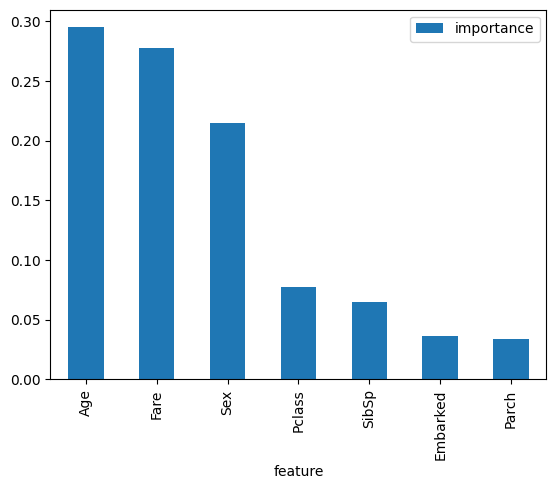

In [360]:
importances.plot.bar()

In [361]:
#print the prediction of random forest classifier
pred=model[4].predict(X_test)
print(pred)

print()

# Print the actual values
print(Y_test)

[1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1
 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]

[1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0]


In [362]:
X_test

array([[0.5       , 0.        , 0.34243804, ..., 0.        , 0.02537431,
        1.        ],
       [0.        , 1.        , 0.69650986, ..., 0.        , 0.06929139,
        0.        ],
       [1.        , 1.        , 0.22862924, ..., 0.        , 0.01541158,
        1.        ],
       ...,
       [1.        , 1.        , 0.24127466, ..., 0.        , 0.01854277,
        1.        ],
       [1.        , 1.        , 0.3639241 , ..., 0.        , 0.01571255,
        1.        ],
       [0.5       , 1.        , 0.29185635, ..., 0.        , 0.02049464,
        1.        ]])

In [363]:
X_train.shape

(711, 7)

In [364]:
Data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [401]:
Data.drop('Survived',axis=1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [430]:
# Pclass        int64
# Sex           int32
# Age         float64
# SibSp         int64
# Parch         int64
# Fare        float64
# Embarked      int32

my_survival=pd.DataFrame({'Pclass':2,
                          'Sex':0,
                          'Age':14,
                          'SibSp':1,
                          'Parch':0,
                          'Fare':30.0708,
                          'Embarked':0,},index=[0])

# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# sc.fit(my_survival)
# my_survival=sc.transform(my_survival)
p=model[2].predict(my_survival)


if p[0]==0:
    print("Not survived")
else:
    print("Survived!")
    

Not survived


c:\Users\Gaurav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [366]:
# my_survival=[[3,1,21,0,0,1]]
